# Basic setup for fetching data from the facebook api

### Remember to add an active access token below and adjust the parameters and fields if necessary

In [ ]:
# must be specified to be able to use methods of package
import sys
sys.path.append('../src') 
import numpy as np
import pandas as pd
from political_ads.api_request import API_request
from political_ads.preprocessor import Preprocessor

# Generates a dataset (in the data directory)
requestor = API_request()
requestor.generate_dataset(500, "climate", "EAAD3So8oorMBAMG0icdlft8e9Sjis7jSwoMsaLnsTadVrpysOaZA4H87Kay8eWHajacEfysxUqCkAIwKYD2jEfgy7ZBtmMtuZCRiwZBNyWpy7u0c7W2K2DtRELUyNXOv9ukN5M2Gum4DJ0FdDYffwiheYjI8VcbUJtFHPqaZBA9nCJaFw1lEXhDAMZCcEeyEAqJMKgzgEBRpH7RDI4YDngPmNzIf3UFIsI4qs0vNOv8j9CItNwNORQAiSM3zADXZBoZD")


In [4]:
# Returns text file as dataframe with transformations
preprocess = Preprocessor()
data = preprocess.file_to_df("..\\data\\generated_dataset.txt")

In [6]:
data.head(2)

,ad_creation_time,ad_creative_body,spend,impressions,delivery_by_region,demographic_distribution,page_id,page_name,bylines,id
0,2021-07-01,It's a vibe. We’re excited to announce that Dr...,2749.5,849999.5,"[{'percentage': '3.0E-6', 'region': 'Yangon'},...","[{'percentage': '1.8E-5', 'age': '55-64', 'gen...",653079394725698,Aspiration,Aspiration,2883391761877521
1,2021-08-27,🌎 Sierra Club's City Hike-A-Thon is a national...,49.5,1499.5,"[{'percentage': '0.789011', 'region': 'Massach...","[{'percentage': '0.006508', 'age': '45-54', 'g...",6204742571,Sierra Club,SIERRA CLUB,161524832762330


<AxesSubplot:xlabel='ad_creation_time'>

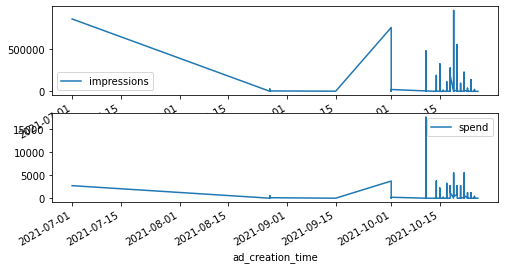

In [7]:
'''
Visualization attempts
https://pandas.pydata.org/pandas-docs/dev/getting_started/intro_tutorials/09_timeseries.html
'''
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting spending over time and impressions over time 
fig, axes = plt.subplots(2,1,figsize=(8,4))
data.plot(x="ad_creation_time", y="impressions", ax=axes[0])
data.plot(x="ad_creation_time", y="spend", ax=axes[1])

In [9]:
'''
Amount spend by facebook page
Calculate as lower range and upper range!
'''
by_page = data.groupby("page_name").agg(
    # Aggregate no of ads
    no_ads = ('id', 'count'),
    # Aggregate sum of spend
    sum_spend = ('spend', 'sum'),
    # Average number of impressions per ad
    avg_impressions = ('impressions', 'mean')

).reset_index()

by_page

,page_name,no_ads,sum_spend,avg_impressions
0,100 Percent Campaign,1,149.5,7499.500000
1,198 Methods,2,99.0,999.500000
2,2020Vision4Election2022,1,49.5,499.500000
3,350 Seattle,5,247.5,1899.500000
4,350.org,125,7587.5,1603.500000
...,...,...,...,...
412,World Bank,1,49.5,17499.500000
413,Yale Climate Connections,11,544.5,3135.863636
414,ZF Group,1,449.5,22499.500000
415,Zac Bears for Medford City Council,5,247.5,499.500000


In [ ]:
data[data["page_name"] == "Sierra Club"]

In [ ]:
'''
Data Generation
Loop to continuously fetch data, until there exists a next page
'''
import time

counter = 0
while "next" in response["paging"]:
    response = get_json_response(response["paging"]["next"], access_token)
    new_data = pd.DataFrame(response["data"])
    data = data.append(new_data, ignore_index=True)
    counter += 1
    time.sleep(10)
    print(f"Iteration number {counter}")

# Could go up to 70.000 entries
# Reached iteration 140

In [ ]:
data.to_csv("..\\data\\exported_df.csv", index=False, header=True)

In [ ]:
test = pd.read_csv("..\\data\\exported_df.csv")

test["delivery_by_region"].isnull().count()

In [ ]:
import sys
sys.path.append('../src') 

from political_ads.Preprocessor import Preprocessor

In [ ]:
'''
Read data sample
'''

import json

sample = pd.read_csv("..\\data\\exported_df.csv")

type(sample["ad_creation_time"][0])

In [ ]:
sample["spend"] = sample["spend"].apply(lambda x: string_to_dict(x)).apply(lambda x: transform_range(x))

In [ ]:
sample["spend"] = sample["spend"].apply(lambda x: string_to_dict(x))
sample["impressions"] = sample["impressions"].apply(lambda x: string_to_dict(x))

In [ ]:
sample["spend"] = sample["spend"].apply(lambda x: transform_range(x))

In [ ]:
'''
Congress member filtering
'''

congress_members = pd.DataFrame(pd.read_csv("..\\src\\data_sets\\legislators-current.csv"))

In [ ]:
congress_members["facebook"]

In [ ]:
congress_members["facebook"].isnull().sum()
537-165

In [ ]:
# Scraper experiement
# https://github.com/kevinzg/facebook-scraper

from facebook_scraper import get_page_info

page = get_page_info(account="senatorcantwell")

page

In [ ]:
import time

members_fbNames = [] # list of tuples
members_fbNames_test = [] # list of tuples

for value in congress_members["facebook"][:50].items():
    if not pd.isnull(value[1]):
        page = get_page_info(account=value[1])
        print(page)
        if "name" in page:
            members_fbNames_test.append((value[1], page["name"]))
            print(page["name"])
    time.sleep(0.5)

In [ ]:
members_names = pd.DataFrame(members_fbNames, columns=["facebook", "page_name"])
members_names.shape

In [ ]:
members_fbNames_test

In [ ]:
# Save data as csv
members_names.to_csv("..\\src\\data_sets\\congress_fbNames.csv", index=False, header=True)